In [1]:
# Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import os
import numpy as np

# File load
file1 = os.path.join('csv_exports', 'Shootings.csv' )
file2 = os.path.join('csv_exports', 'Census.csv' )
file3 = os.path.join('csv_exports', 'Combined.csv' )

# File read
shootings_df = pd.read_csv(file1)
census = pd.read_csv(file2)
combined = pd.read_csv(file3)

In [2]:
shootings_df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,abbreviation,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,Male,Asian,Shelton,Washington,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,Male,White,Aloha,Oregon,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,Male,Hispanic,Wichita,Kansas,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,Male,White,San Francisco,California,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,Male,Hispanic,Evans,Colorado,CO,False,attack,Not fleeing,False


In [3]:
# Victim age analysis, excluding 'unknown' output in the age column
filtered_df = shootings_df[shootings_df['age'].str.match('^Unknown') == False]

# Age is an object due to the way unknown values are listed
# Updated age column
filtered_df[['age']] = filtered_df[['age']].astype('float')
filtered_df.dtypes

C:\Users\szerp\Anacoda3\envs\PythonData2\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
abbreviation                object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
dtype: object

In [6]:
# Identified min and max age
min_age = filtered_df['age'].min()
max_age = filtered_df['age'].max()
print(f'Minimum age: {min_age} \nMaximum age: {max_age}')

Minimum age: 6.0 
Maximum age: 91.0


In [11]:
# Bin Analysis
bins = [0, 9, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 89, 100]

# Categorize age groups
age_groups = ["<10", "10-15", "16-20", "21-25", "26-30",
              "31-35", "36-40", "41-45", "46-50", "51-55", "56-60",
              "61-65", "66-70", "71-75", "76-80", "81-85", "86-89","90+" ]

filtered_df['age groups'] = pd.cut(filtered_df['age'], bins, labels=age_groups, include_lowest=True)

# Count check
age_group_counts = filtered_df['age groups'].value_counts()
age_group_counts

C:\Users\szerp\Anacoda3\envs\PythonData2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


31-35    848
26-30    804
21-25    689
36-40    677
41-45    497
46-50    441
16-20    355
51-55    326
56-60    255
61-65    149
66-70     80
71-75     31
76-80     20
10-15     18
81-85     12
86-89      3
<10        2
90+        1
Name: age groups, dtype: int64

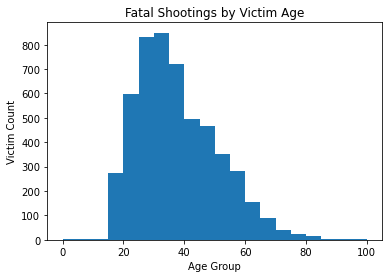

In [31]:
# Age group histogram using prior specified bins
plt.hist(filtered_df['age'], bins=bins)
plt.title('Fatal Shootings by Victim Age')
plt.xlabel('Age Group')
plt.ylabel('Victim Count')
plt.show()

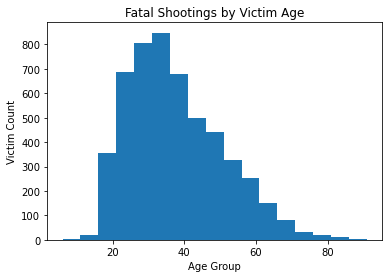

In [49]:
# Age group histogram for every 5 years
plt.hist(filtered_df['age'], bins=range(int(min_age), int(max_age) + 1, 5))
plt.title('Fatal Shootings by Victim Age')
plt.xlabel('Age Group')
plt.ylabel('Victim Count')
plt.show()

In [52]:
# Analysis of shooting events year by year in the U.S
# NOTE - THE DATE COLUMN TRANSFERED AS AN OBJECT THOUGH THIS WAS CLEANED IN THE PRIOR FILE
shootings_df['date'] = pd.to_datetime(shootings_df['date'],format='%Y-%m-%d') 
shootings_df.dtypes

id                                  int64
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                                object
gender                             object
race                               object
city                               object
state                              object
abbreviation                       object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
dtype: object

In [94]:
# Overall shootings per day analysis
yearly_shootings_grp = shootings_df.groupby('date')
date_df = pd.DataFrame(yearly_shootings_grp['id'].count())
date_df = date_df.reset_index()
date_df = date_df.rename(columns={'id':'id count'})
date_df

,date,id count
0,2015-01-02,2
1,2015-01-03,1
2,2015-01-04,3
3,2015-01-05,1
4,2015-01-06,4
...,...,...
1853,2020-06-26,3
1854,2020-06-27,5
1855,2020-06-28,1
1856,2020-06-29,3


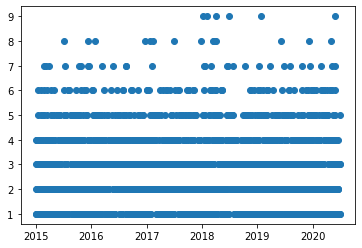

In [95]:
plt.scatter(date_df['date'], date_df['id count'])
plt.show()

# plt.bar?
# plt.scatter?
#shootings_df.groupby(lambda x: x.year)['date'].agg(['count'])
# test = shootings_df.groupby(['date'])['id', 'city', 'state']
# test['state'].value_counts()
#test['id'].counts()
# plt.plot(x=shootings_df['city'], y=shootings_d)
# shootings_df.plot(kind='bar', x='state') #value_counts()

In [97]:
# plt.hist(date_df['date'])
# plt.title('')
# plt.xlabel('')
# plt.ylabel('')
# plt.show()